# Laboratorio #1 - Introducción al Procesamiento de Imágenes

#### Problema #1
Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la función debe devolver una imagen la cual tenga activos los canales de color

In [6]:
import numpy as np

def activar_canales_color(imagen, color):
    # Copia de la imagen
    img_activada = np.copy(imagen)

    # Se desactivan todos los canales de color
    img_activada[:, :, 0] = 0  # Canal rojo
    img_activada[:, :, 1] = 0  # Canal verde
    img_activada[:, :, 2] = 0  # Canal azul

    # Se activan los canales dependiendo del color
    if color == 1:
        img_activada[:, :, 2] = imagen[:, :, 2]  # Canal azul
    elif color == 2:
        img_activada[:, :, 1] = imagen[:, :, 1]  # Canal verde
    elif color == 3:
        img_activada[:, :, 0] = imagen[:, :, 0]  # Canal rojo
    elif color == 10:
        img_activada[:, :, 0] = imagen[:, :, 0]  # Canal rojo
        img_activada[:, :, 1] = imagen[:, :, 1]  # Canal verde
    elif color == 20:
        img_activada[:, :, 1] = imagen[:, :, 1]  # Canal verde
        img_activada[:, :, 2] = imagen[:, :, 2]  # Canal azul
    elif color == 30:
        img_activada[:, :, 0] = imagen[:, :, 0]  # Canal rojo
        img_activada[:, :, 2] = imagen[:, :, 2]  # Canal azul

    return img_activada

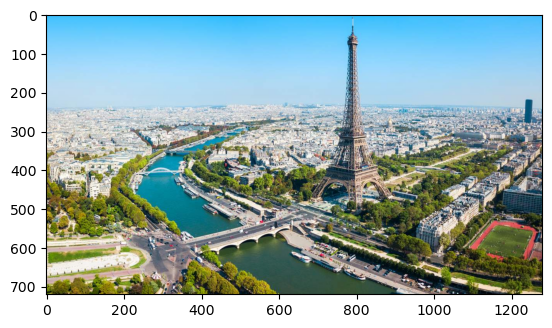

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("paris.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

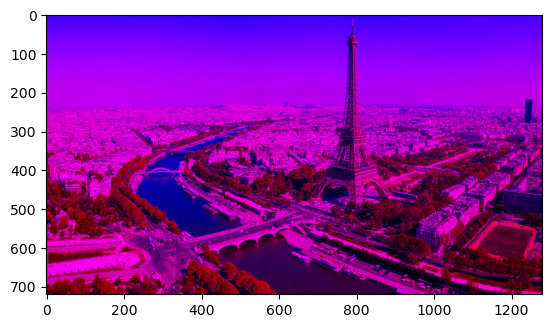

In [12]:
# Se llama a la función para obtener la imagen con los canales activos
imagen_activada = activar_canales_color(img, 30)
plt.imshow(imagen_activada)
plt.show()

#### Problema #2
Cree una función que dadas las 3 imágenes se construya la imagen original a color.

In [13]:
def construir_imagen_color(imagen_gray_rojo, imagen_gray_verde, imagen_gray_azul):
    # Leer las tres imágenes en escala de grises
    img_gray_rojo = cv2.imread(imagen_gray_rojo, cv2.IMREAD_GRAYSCALE)
    img_gray_verde = cv2.imread(imagen_gray_verde, cv2.IMREAD_GRAYSCALE)
    img_gray_azul = cv2.imread(imagen_gray_azul, cv2.IMREAD_GRAYSCALE)

    # Se crea una matriz de ceros con el mismo tamaño que las imágenes en escala de grises
    alto, ancho = img_gray_rojo.shape
    img_color = np.zeros((alto, ancho, 3), dtype=np.uint8)

    # Asignar cada imagen en escala de grises a un canal de color
    img_color[:, :, 0] = img_gray_azul  # Canal azul
    img_color[:, :, 1] = img_gray_verde  # Canal verde
    img_color[:, :, 2] = img_gray_rojo  # Canal rojo

    return img_color

##### Imagen #1

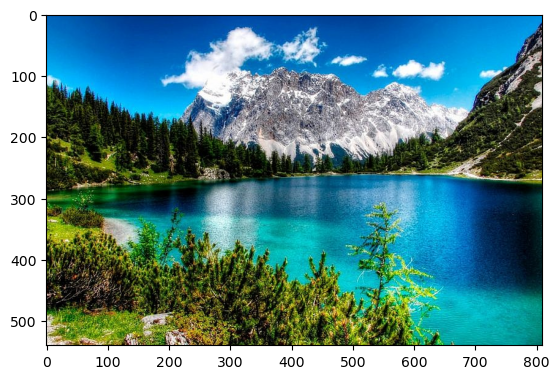

In [22]:
imagen1_salida_gray_azul = "imagen1\imagen1_salida_gray_azul.jpg"
imagen1_salida_gray_rojo = "imagen1\imagen1_salida_gray_rojo.jpg"
imagen1_salida_gray_verde = "imagen1\imagen1_salida_gray_verde.jpg"

imagen_a_color = construir_imagen_color(imagen1_salida_gray_rojo, imagen1_salida_gray_verde, imagen1_salida_gray_azul)
img_color = cv2.cvtColor(imagen_a_color, cv2.COLOR_BGR2RGB)
plt.imshow(img_color)
plt.show()

##### Imagen #2

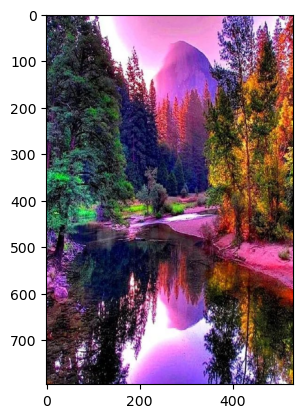

In [23]:
imagen2_salida_gray_azul = "imagen2\imagen2_salida_gray_azul.jpg"
imagen2_salida_gray_rojo = "imagen2\imagen2_salida_gray_rojo.jpg"
imagen2_salida_gray_verde = "imagen2\imagen2_salida_gray_verde.jpg"

imagen_a_color_2 = construir_imagen_color(imagen2_salida_gray_rojo, imagen2_salida_gray_verde, imagen2_salida_gray_azul)
img_color_2 = cv2.cvtColor(imagen_a_color_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_color_2)
plt.show()

##### Imagen #3

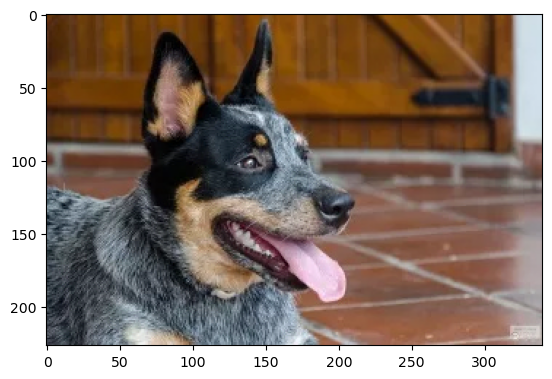

In [28]:
imagen3_salida_gray_azul = "imagen3\perro_salida_gray_azul.jpg"
imagen3_salida_gray_rojo = "imagen3\perro_salida_gray_rojo.jpg"
imagen3_salida_gray_verde = "imagen3\perro_salida_gray_verde.jpg"

imagen_a_color_3 = construir_imagen_color(imagen3_salida_gray_rojo, imagen3_salida_gray_verde, imagen3_salida_gray_azul)
img_color_3 = cv2.cvtColor(imagen_a_color_3, cv2.COLOR_BGR2RGB)
plt.imshow(img_color_3)
plt.show()

#### Problema #3
Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su función debe crear 3 imágenes como salida.

In [29]:
import os

def crear_escala_grises_en_tres_dimensiones(imagen_original, nombre_imagen):
    # Leer la imagen original
    img = cv2.imread(imagen_original)

    # Obtener los canales de color
    b, g, r = cv2.split(img)

    # Guardar las imágenes en escala de grises en el folder "resultados_problema_3"
    folder_resultados = "resultados_problema_3"
    if not os.path.exists(folder_resultados):
        os.makedirs(folder_resultados)

    # Guardar la imagen en escala de grises del canal azul
    img_gray_azul = os.path.join(folder_resultados, f"{nombre_imagen}_gray_azul.jpg")
    cv2.imwrite(img_gray_azul, b)

    # Guardar la imagen en escala de grises del canal verde
    img_gray_verde = os.path.join(folder_resultados, f"{nombre_imagen}_gray_verde.jpg")
    cv2.imwrite(img_gray_verde, g)

    # Guardar la imagen en escala de grises del canal rojo
    img_gray_rojo = os.path.join(folder_resultados, f"{nombre_imagen}_gray_rojo.jpg")
    cv2.imwrite(img_gray_rojo, r)

    return img_gray_rojo, img_gray_verde, img_gray_azul


In [31]:
img_problema3 = "resultados_problema_3\_venecia_original.jpeg"
#Los resultados fueron guardados en el folder 'resultados_problema_3'
img_problema3_gray_rojo, img_problema3_verde, img_problema3_gray_azul = crear_escala_grises_en_tres_dimensiones(img_problema3, "_venecia")

#### Problema #4
Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media de la distribución.

In [41]:
def chanel_hist(imagen):

    # Se obtiene el histograma de una imagen en escala de grises (promedio aritmético)
    img_gray = np.mean(imagen, axis=2, dtype=np.uint8)

    # Se obtienen los histogramas de cada canal de color
    hist_rojo = np.histogram(imagen[:, :, 2].ravel(), bins=256, range=[0, 256])[0]
    hist_verde = np.histogram(imagen[:, :, 1].ravel(), bins=256, range=[0, 256])[0]
    hist_azul = np.histogram(imagen[:, :, 0].ravel(), bins=256, range=[0, 256])[0]
    hist_gray = np.histogram(img_gray.ravel(), bins=256, range=[0, 256])[0]

    # Se calcula la media de cada histograma
    media_rojo = np.mean(hist_rojo)
    media_verde = np.mean(hist_verde)
    media_azul = np.mean(hist_azul)
    media_gray = np.mean(hist_gray)

    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle("Histogramas de Canales de Color y Escala de Grises")

    # Canal Rojo
    axs[0, 0].plot(hist_rojo, color='red')
    axs[0, 0].axvline(x=media_rojo, color='black', label='Media')
    axs[0, 0].set_title("Canal Rojo")
    axs[0, 0].set_xlim([0, 255])
    axs[0, 0].legend()

    # Canal Verde
    axs[0, 1].plot(hist_verde, color='green')
    axs[0, 1].axvline(x=media_verde, color='black', label='Media')
    axs[0, 1].set_title("Canal Verde")
    axs[0, 1].set_xlim([0, 255])
    axs[0, 1].legend()

    # Canal Azul
    axs[1, 0].plot(hist_azul, color='blue')
    axs[1, 0].axvline(x=media_azul, color='black', label='Media')
    axs[1, 0].set_title("Canal Azul")
    axs[1, 0].set_xlim([0, 255])
    axs[1, 0].legend()

    # Escala de Grises
    axs[1, 1].plot(hist_gray, color='black')
    axs[1, 1].axvline(x=media_gray, color='black', label='Media')
    axs[1, 1].set_title("Escala de Grises")
    axs[1, 1].set_xlim([0, 255])
    axs[1, 1].legend()

    # Se muestra la figura
    plt.show()


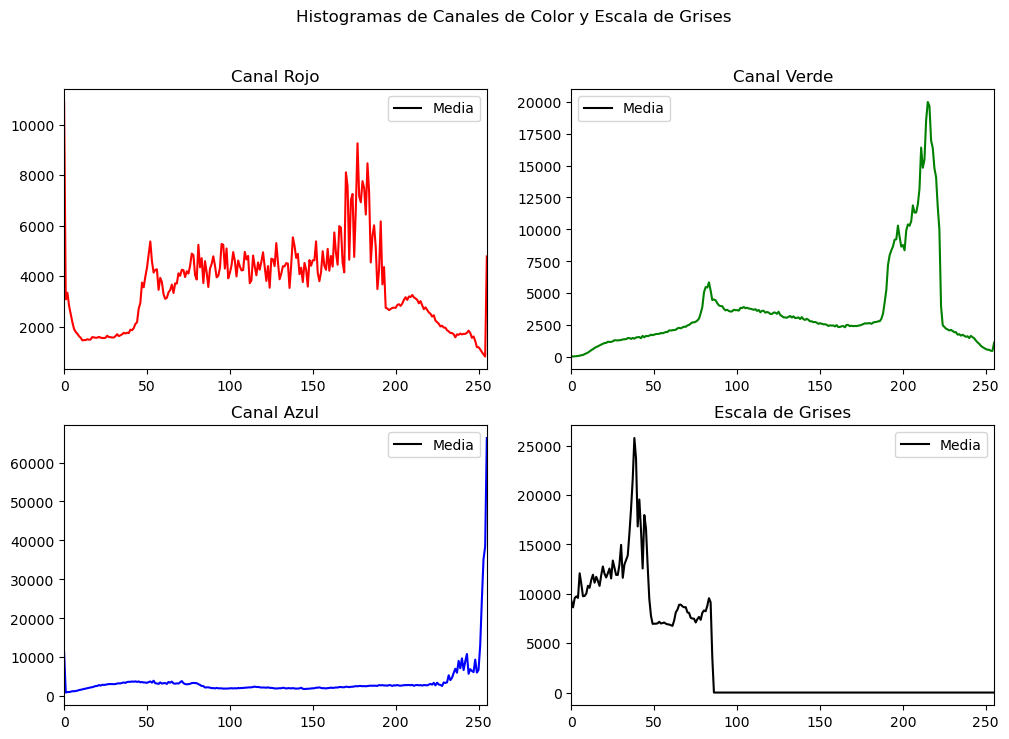

In [42]:
imagen = cv2.imread("paris.jpg")
chanel_hist(imagen)

#### Problema #5
¿En que consiste el espacio de color HSV y como se mapean colores a dicho espacio?

El espacio de color HSV (Hue, Saturation, Value) el cual se puede ver como un sistema el cual representa colores que separan los atributos de una imagen: tonalidad, saturación, y valor. Desde un punto de vista de utilidad, este espacio es útil debido a que es muy fácil de manipular así como interpretar. Deglosando los componentes del espacio de color HSV tenemos lo siguiente:

* Hue (Tonalidad): indica el tipo del color, que viene dado en valores que varíoan de 0 a 360 grados, esto para abarcar el espectro de colores en su totalidad.
* Saturación: representa la intensidad del color, entre mayor es su valor mas intenso y saturado esta una imagen de dicho color.
* Valor: indica el brillo o claridad del color en la imagen, un valor mas alto indica mayor brillantez en la imagen y uno mas bajo indica un color mas tenue.

